# Importing Libraries

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import fiona
from fiona.crs import from_epsg
import geoplot
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import datetime
import statsmodels.api as sm

plt.rcParams['savefig.facecolor'] = 'white'
%matplotlib inline

Printing versions of Python modules and packages with **watermark** - the IPython magic extension.

In [2]:
%load_ext watermark

In [3]:
%watermark -v -p numpy,pandas,geopandas,geoplot,fiona,matplotlib.pyplot,seaborn

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy            : 1.23.1
pandas           : 1.4.3
geopandas        : 0.11.1
geoplot          : 0.5.1
fiona            : 1.8.21
matplotlib.pyplot: unknown
seaborn          : 0.11.2



Documention for installing watermark: https://github.com/rasbt/watermark

# Retrieve Data

In [4]:
path = 'https://raw.githubusercontent.com/mebauer/nyc-311-street-flooding/main/data/\
street-flooding-complaints.csv'

df = pd.read_csv(path, low_memory=False)
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude, crs=4263))

gdf = gdf.dropna(subset=['longitude']).reset_index(drop=True)
gdf = gdf.to_crs(2263)

print(gdf.shape)
gdf.head()

(26959, 35)


,unique_key,created_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,cross_street_1,...,intersection_street_1,intersection_street_2,closed_date,resolution_description,resolution_action_updated_date,location_type,landmark,facility_type,due_date,geometry
0,48542220,2020-12-31T15:41:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11420.0,117-17 135 STREET,135 STREET,FOCH BLVD,...,NaN,NaN,2021-01-01T00:20:00.000,Please call 311 for further information. If yo...,2021-01-01T00:20:00.000,NaN,NaN,NaN,NaN,POINT (1038500.000 186000.014)
1,48536430,2020-12-31T14:49:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11357.0,20-24 150 STREET,150 STREET,20 AVE,...,NaN,NaN,2021-01-04T10:15:00.000,The Department of Environment Protection inspe...,2021-01-04T10:15:00.000,NaN,NaN,NaN,NaN,POINT (1035682.000 223771.014)
2,48539361,2020-12-31T14:03:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11228.0,7223 8 AVENUE,8 AVENUE,72 ST,...,NaN,NaN,2021-01-02T11:25:00.000,The Department of Environmental Protection has...,2021-01-02T11:25:00.000,NaN,NaN,NaN,NaN,POINT (979584.000 168255.014)
3,48543132,2020-12-31T13:48:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10032.0,NaN,NaN,NaN,...,RIVERSIDE DRIVE,WEST 165 STREET,2020-12-31T14:50:00.000,Please call 311 for further information. If yo...,2020-12-31T14:50:00.000,NaN,NaN,NaN,NaN,POINT (999557.000 245700.014)
4,48536441,2020-12-31T13:10:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11234.0,3123 FILLMORE AVENUE,FILLMORE AVENUE,E 31 ST,...,NaN,NaN,2021-01-03T10:45:00.000,The Department of Environmental Protection ins...,2021-01-03T10:45:00.000,NaN,NaN,NaN,NaN,POINT (1001868.000 161232.014)


<AxesSubplot:>

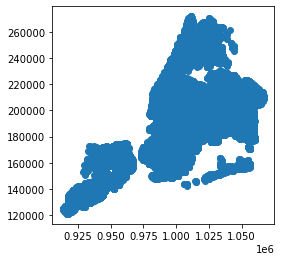

In [5]:
gdf.plot()

In [6]:
path = '~/Downloads/nyc_mappluto_22v3_1_fgdb/MapPLUTO_22v3_1.gdb'
pluto_gdf = gpd.read_file(path, rows=500)

pluto_gdf = pluto_gdf.to_crs(2263)

print(pluto_gdf.shape)
pluto_gdf.head()

(500, 95)


,Borough,Block,Lot,CD,BCT2020,BCTCB2020,CT2010,CB2010,SchoolDist,Council,...,FIRM07_FLAG,PFIRM15_FLAG,Version,DCPEdited,Latitude,Longitude,Notes,Shape_Leng,Shape_Area,geometry
0,MN,1,10,101,1000500,10005000003,5,1000,02,1,...,1,1,22v3.1,None,40.688766,-74.018682,None,0.0,7.478663e+06,"MULTIPOLYGON (((980783.787 191526.763, 980898...."
1,MN,1,101,101,1000100,None,1,1001,02,1,...,None,1,22v3.1,None,40.689920,-74.045337,None,0.0,5.018973e+05,"MULTIPOLYGON (((972409.690 190685.560, 972428...."
2,MN,1,201,101,1000100,10001001000,1,1000,02,1,...,None,1,22v3.1,None,40.698188,-74.041329,None,0.0,1.148539e+06,"MULTIPOLYGON (((973648.661 193712.461, 973648...."
3,MN,2,1,101,1000900,10009001022,9,1025,02,1,...,1,1,22v3.1,t,40.700369,-74.012911,None,0.0,1.008250e+05,"MULTIPOLYGON (((980639.785 194217.691, 980609...."
4,MN,2,2,101,1000900,10009001022,9,1025,02,1,...,1,1,22v3.1,None,40.700550,-74.011588,None,0.0,8.724425e+04,"MULTIPOLYGON (((980915.002 194319.141, 980795...."


<AxesSubplot:>

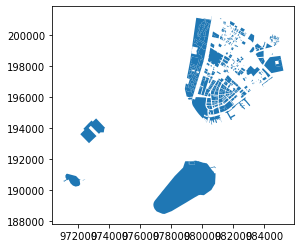

In [7]:
pluto_gdf.plot()

In [8]:
pluto_gdf.sindex

rtree.index.Index(bounds=[971045.2731347084, 188447.4288892746, 985249.228328228, 201211.1846499443], size=70)

In [9]:
offset = 200
bbox = gdf.bounds + [-offset, -offset, offset, offset]

bbox.head()

,minx,miny,maxx,maxy
0,1.038300e+06,185800.014393,1.038700e+06,186200.014393
1,1.035482e+06,223571.014417,1.035882e+06,223971.014417
2,9.793840e+05,168055.014382,9.797840e+05,168455.014382
3,9.993570e+05,245500.014431,9.997570e+05,245900.014431
4,1.001668e+06,161032.014377,1.002068e+06,161432.014377


In [10]:
hits = bbox.apply(lambda row: list(pluto_gdf.sindex.intersection(row)), axis=1)

print(hits.shape)
hits.head()

(26959,)


0    []
1    []
2    []
3    []
4    []
dtype: object

In [11]:
tmp = pd.DataFrame(
        {
        # index of points table
        "pt_idx": np.repeat(hits.index, hits.apply(len)),

        # ordinal position of line - access via iloc later
        "line_i": np.concatenate(hits.values)
        }
)

print(tmp.shape)
tmp.head()

(721, 2)


,pt_idx,line_i
0,459,128.0
1,459,145.0
2,459,137.0
3,459,139.0
4,459,140.0


In [12]:
# Join back to the lines on line_i; we use reset_index() to 
# give us the ordinal position of each line
tmp = tmp.join(pluto_gdf.reset_index(drop=True), on="line_i")

tmp.head()

,pt_idx,line_i,Borough,Block,Lot,CD,BCT2020,BCTCB2020,CT2010,CB2010,...,FIRM07_FLAG,PFIRM15_FLAG,Version,DCPEdited,Latitude,Longitude,Notes,Shape_Leng,Shape_Area,geometry
0,459,128.0,MN,79,27,101,1001502,10015021000,15.02,1000,...,None,None,22v3.1,None,40.710322,-74.008466,None,0.0,5670.917438,"MULTIPOLYGON (((981955.698 198099.048, 981894...."
1,459,145.0,MN,92,23,101,1001501,10015011011,15.01,1007,...,None,None,22v3.1,None,40.710594,-74.007185,None,0.0,1702.936740,"MULTIPOLYGON (((982289.308 198169.543, 982267...."
2,459,137.0,MN,89,3,101,1001501,10015011017,15.01,1005,...,None,None,22v3.1,None,40.710635,-74.007964,None,0.0,5632.008015,"MULTIPOLYGON (((982020.597 198116.096, 981985...."
3,459,139.0,MN,90,23,101,1001501,10015011009,15.01,1004,...,None,None,22v3.1,None,40.710956,-74.007773,None,0.0,1021.570578,"MULTIPOLYGON (((982110.692 198297.452, 982090...."
4,459,140.0,MN,90,24,101,1001501,10015011009,15.01,1004,...,None,None,22v3.1,None,40.711005,-74.007817,None,0.0,1242.680263,"MULTIPOLYGON (((982106.447 198327.138, 982072...."


In [13]:
# Join back to the original points to get their geometry
# rename the point geometry as "point"
tmp = tmp.join(gdf.geometry.rename("point"), on="pt_idx")

# Convert back to a GeoDataFrame, so we can do spatial ops
tmp = gpd.GeoDataFrame(tmp, geometry="geometry", crs=gdf.crs)

tmp.head()

,pt_idx,line_i,Borough,Block,Lot,CD,BCT2020,BCTCB2020,CT2010,CB2010,...,PFIRM15_FLAG,Version,DCPEdited,Latitude,Longitude,Notes,Shape_Leng,Shape_Area,geometry,point
0,459,128.0,MN,79,27,101,1001502,10015021000,15.02,1000,...,None,22v3.1,None,40.710322,-74.008466,None,0.0,5670.917438,"MULTIPOLYGON (((981955.698 198099.048, 981894....",POINT (982027.000 198304.014)
1,459,145.0,MN,92,23,101,1001501,10015011011,15.01,1007,...,None,22v3.1,None,40.710594,-74.007185,None,0.0,1702.936740,"MULTIPOLYGON (((982289.308 198169.543, 982267....",POINT (982027.000 198304.014)
2,459,137.0,MN,89,3,101,1001501,10015011017,15.01,1005,...,None,22v3.1,None,40.710635,-74.007964,None,0.0,5632.008015,"MULTIPOLYGON (((982020.597 198116.096, 981985....",POINT (982027.000 198304.014)
3,459,139.0,MN,90,23,101,1001501,10015011009,15.01,1004,...,None,22v3.1,None,40.710956,-74.007773,None,0.0,1021.570578,"MULTIPOLYGON (((982110.692 198297.452, 982090....",POINT (982027.000 198304.014)
4,459,140.0,MN,90,24,101,1001501,10015011009,15.01,1004,...,None,22v3.1,None,40.711005,-74.007817,None,0.0,1242.680263,"MULTIPOLYGON (((982106.447 198327.138, 982072....",POINT (982027.000 198304.014)


In [14]:
tmp["snap_dist"] = tmp.geometry.distance(gpd.GeoSeries(tmp.point))

tmp.head()

,pt_idx,line_i,Borough,Block,Lot,CD,BCT2020,BCTCB2020,CT2010,CB2010,...,Version,DCPEdited,Latitude,Longitude,Notes,Shape_Leng,Shape_Area,geometry,point,snap_dist
0,459,128.0,MN,79,27,101,1001502,10015021000,15.02,1000,...,22v3.1,None,40.710322,-74.008466,None,0.0,5670.917438,"MULTIPOLYGON (((981955.698 198099.048, 981894....",POINT (982027.000 198304.014),210.186017
1,459,145.0,MN,92,23,101,1001501,10015011011,15.01,1007,...,22v3.1,None,40.710594,-74.007185,None,0.0,1702.936740,"MULTIPOLYGON (((982289.308 198169.543, 982267....",POINT (982027.000 198304.014),244.527951
2,459,137.0,MN,89,3,101,1001501,10015011017,15.01,1005,...,22v3.1,None,40.710635,-74.007964,None,0.0,5632.008015,"MULTIPOLYGON (((982020.597 198116.096, 981985....",POINT (982027.000 198304.014),69.911787
3,459,139.0,MN,90,23,101,1001501,10015011009,15.01,1004,...,22v3.1,None,40.710956,-74.007773,None,0.0,1021.570578,"MULTIPOLYGON (((982110.692 198297.452, 982090....",POINT (982027.000 198304.014),49.550503
4,459,140.0,MN,90,24,101,1001501,10015011009,15.01,1004,...,22v3.1,None,40.711005,-74.007817,None,0.0,1242.680263,"MULTIPOLYGON (((982106.447 198327.138, 982072....",POINT (982027.000 198304.014),30.673000


In [15]:
# Discard any lines that are greater than tolerance from points
tmp = tmp.loc[tmp.snap_dist <= offset]

# Sort on ascending snap distance, so that closest goes to top
tmp = tmp.sort_values(by=["snap_dist"])

tmp.head()

,pt_idx,line_i,Borough,Block,Lot,CD,BCT2020,BCTCB2020,CT2010,CB2010,...,Version,DCPEdited,Latitude,Longitude,Notes,Shape_Leng,Shape_Area,geometry,point,snap_dist
448,19254,340.0,MN,16,3,101,1031704,10317044000,317.04,4001,...,22v3.1,t,40.712618,-74.016586,None,0.0,2.052775e+06,"MULTIPOLYGON (((980584.841 200985.007, 980594....",POINT (979355.000 197234.014),0.000000
483,19475,340.0,MN,16,3,101,1031704,10317044000,317.04,4001,...,22v3.1,t,40.712618,-74.016586,None,0.0,2.052775e+06,"MULTIPOLYGON (((980584.841 200985.007, 980594....",POINT (979355.000 197234.014),0.000000
324,15235,340.0,MN,16,3,101,1031704,10317044000,317.04,4001,...,22v3.1,t,40.712618,-74.016586,None,0.0,2.052775e+06,"MULTIPOLYGON (((980584.841 200985.007, 980594....",POINT (979759.000 199686.014),0.000000
518,21495,455.0,MN,25,7502,101,1000900,10009001001,9,1000,...,22v3.1,None,40.705919,-74.010766,None,0.0,2.585314e+04,"MULTIPOLYGON (((981284.442 196374.824, 981236....",POINT (981399.000 196469.014),11.267715
516,21495,47.0,MN,25,27,101,1000900,10009001000,9,1000,...,22v3.1,None,40.705686,-74.010287,None,0.0,1.625568e+04,"MULTIPOLYGON (((981492.934 196409.111, 981478....",POINT (981399.000 196469.014),11.310903


In [16]:
# group by the index of the points and take the first, which is the
# closest line 
closest = tmp.groupby("pt_idx").first()

# construct a GeoDataFrame of the closest lines
closest = gpd.GeoDataFrame(closest, geometry="geometry")

closest.head()

,line_i,Borough,Block,Lot,CD,BCT2020,BCTCB2020,CT2010,CB2010,SchoolDist,...,Version,DCPEdited,Latitude,Longitude,Notes,Shape_Leng,Shape_Area,geometry,point,snap_dist
pt_idx,,,,,,,,,,,,,,,,,,,,,
459,138.0,MN,90,1,101,1001501,10015011009,15.01,1004,02,...,22v3.1,None,40.711176,-74.008123,None,0.0,6523.195602,"MULTIPOLYGON (((982041.663 198346.135, 982046....",POINT (982027.000 198304.014),13.819315
1096,353.0,MN,143,7503,101,1003900,10039003007,39,4007,02,...,22v3.1,t,40.717834,-74.009967,None,0.0,5299.637906,"MULTIPOLYGON (((981511.400 200756.768, 981461....",POINT (981500.000 200877.014),26.688052
1859,356.0,MN,144,31,101,1003300,10033002018,33,3022,02,...,22v3.1,t,40.716852,-74.008459,None,0.0,1353.898306,"MULTIPOLYGON (((981934.351 200443.725, 981920....",POINT (981942.000 200380.014),46.337050
2563,386.0,MN,151,1,101,1003300,10033003004,33,1010,02,...,22v3.1,t,40.715820,-74.005977,None,0.0,26217.794000,"MULTIPOLYGON (((982672.512 200047.743, 982690....",POINT (982569.000 199967.014),26.450837
4135,212.0,MN,38,17,101,1000700,10007007002,7,1012,02,...,22v3.1,None,40.705661,-74.006168,None,0.0,28946.530441,"MULTIPOLYGON (((982494.655 196247.048, 982403....",POINT (982649.000 196479.014),31.676819


In [17]:
# Join back to the original points:
updated_points = gdf.join(closest.drop(columns=['geometry']))

updated_points.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,cross_street_1,...,PFIRM15_FLAG,Version,DCPEdited,Latitude,Longitude,Notes,Shape_Leng,Shape_Area,point,snap_dist
0,48542220,2020-12-31T15:41:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11420.0,117-17 135 STREET,135 STREET,FOCH BLVD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
1,48536430,2020-12-31T14:49:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11357.0,20-24 150 STREET,150 STREET,20 AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,48539361,2020-12-31T14:03:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11228.0,7223 8 AVENUE,8 AVENUE,72 ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,48543132,2020-12-31T13:48:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10032.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,48536441,2020-12-31T13:10:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11234.0,3123 FILLMORE AVENUE,FILLMORE AVENUE,E 31 ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [18]:
updated_points.describe()

,unique_key,incident_zip,bbl,x_coordinate_state_plane,y_coordinate_state_plane,latitude,longitude,location_type,landmark,facility_type,...,BBL,CondoNo,XCoord,YCoord,APPBBL,Latitude,Longitude,Shape_Leng,Shape_Area,snap_dist
count,2.695900e+04,26959.000000,1.615900e+04,2.695900e+04,26959.000000,26959.000000,26959.000000,0.0,0.0,0.0,...,8.600000e+01,45.000000,86.000000,86.000000,6.100000e+01,86.000000,86.000000,86.0,8.600000e+01,86.000000
mean,3.254573e+07,10969.384436,3.699429e+09,1.005498e+06,186184.607441,40.677615,-73.923323,NaN,NaN,NaN,...,1.000691e+09,1692.355556,981860.232558,197816.534884,1.000704e+09,40.709637,-74.008620,0.0,1.464337e+05,55.102735
std,9.167418e+06,536.377470,1.075864e+09,3.505257e+04,30576.150750,0.083924,0.126329,NaN,NaN,NaN,...,4.924506e+05,891.678528,1349.550990,1455.157179,4.997937e+05,0.003994,0.004868,0.0,4.086507e+05,41.886663
min,1.563993e+07,10001.000000,0.000000e+00,9.133570e+05,121032.000000,40.498628,-74.254937,NaN,NaN,NaN,...,1.000078e+09,65.000000,979652.000000,195554.000000,1.000070e+09,40.703427,-74.016586,0.0,6.592921e+02,0.000000
25%,2.455603e+07,10312.000000,3.060255e+09,9.868870e+05,161248.000000,40.609123,-73.990504,NaN,NaN,NaN,...,1.000210e+09,960.000000,980937.250000,196635.250000,1.000250e+09,40.706394,-74.011948,0.0,6.331987e+03,28.184895
50%,3.291181e+07,11221.000000,4.067910e+09,1.007480e+06,183618.000000,40.670610,-73.916267,NaN,NaN,NaN,...,1.000610e+09,1704.000000,981720.000000,197685.000000,1.000710e+09,40.709276,-74.009125,0.0,1.725629e+04,38.098773
75%,4.043790e+07,11385.000000,4.156250e+09,1.033980e+06,206488.500000,40.733373,-73.820554,NaN,NaN,NaN,...,1.001055e+09,2442.000000,982535.000000,198845.750000,1.000970e+09,40.712461,-74.006186,0.0,4.467984e+04,75.728271
max,4.854313e+07,11697.000000,5.080500e+09,1.067279e+06,271876.000000,40.912869,-73.700384,NaN,NaN,NaN,...,1.001620e+09,3035.000000,984839.000000,200803.000000,1.001621e+09,40.717834,-73.997875,0.0,2.052775e+06,165.787876


In [19]:
updated_points['unique_key'].is_unique

True